### airplane data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr,linregress
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("airplane_data.csv",sep="\t")

data

,Distance (miles),Cost (USD)
0,337,59.50
1,2565,509.50
2,967,124.50
3,5124,1480.40
4,2398,696.23
5,2586,559.50
6,7412,1481.50
7,522,474.50
8,1499,737.50


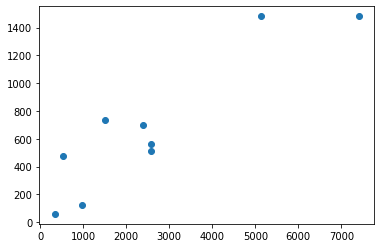

In [3]:
plt.scatter(data["Distance (miles)"],data["Cost (USD)"]);

In [4]:
r,p = pearsonr(data["Distance (miles)"],data["Cost (USD)"])
print(r)
print(p)

0.9090036493537198
0.0006840064730744034


In [5]:
r2 = r ** 2
r2

0.8262876345383804

82.6% off difference in the cost is due to the difference in distance

**regression line slope = r * ( std(y) / std(x) )**

Standart deviations with Bessel's correction

In [6]:
stdx = np.std(data["Distance (miles)"],ddof=1)
stdy = np.std(data["Cost (USD)"],ddof=1)
print(stdx)
print(stdy)

2315.336824548668
508.1870022879811


In [7]:
slope = r * (stdy / stdx)
slope

0.19951474650948436

The line of the best fit will alwas go through the means of X and Y

**y bar = intercept + slope * x bar**

In [8]:
xbar = np.mean(data["Distance (miles)"])
ybar = np.mean(data["Cost (USD)"])
print(xbar)
print(ybar)

2601.1111111111113
680.3477777777778


In [9]:
intercept = ybar - slope * xbar
intercept

161.38775380144114

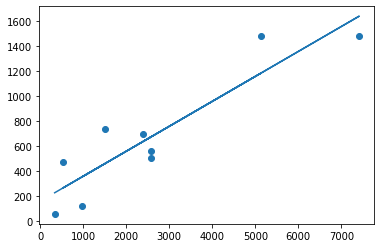

In [11]:
plt.scatter(data["Distance (miles)"],data["Cost (USD)"])
plt.plot(data["Distance (miles)"], slope * data["Distance (miles)"] + intercept);

Automatic regression line (with and without confidence interval)

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


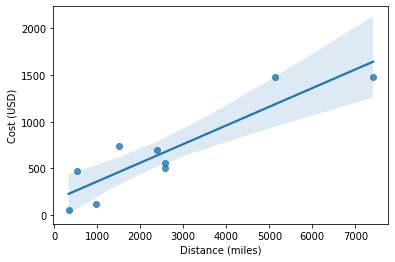

In [12]:
sns.regplot(data["Distance (miles)"],data["Cost (USD)"]);

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


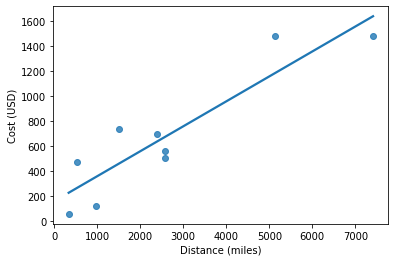

In [13]:
sns.regplot(data["Distance (miles)"],data["Cost (USD)"],ci=None);

Automatic calculation of slope and intercept

In [22]:
import statsmodels.formula.api as smf

In [28]:
mod = smf.ols('Q("Cost (USD)") ~ Q("Distance (miles)")', data=data) #Q('') is used for columns with spaces
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Cost (USD)")   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     33.30
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           0.000684
Time:                        19:28:53   Log-Likelihood:                -60.441
No. Observations:                   9   AIC:                             124.9
Df Residuals:                       7   BIC:                             125.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               161.3878    117.411      1.375      0.212    -116.244     439.020
Q("Distance (miles)")     0.1995      0.035      5.770      0.001       0.118       0.281
==============================================================================
Omnibus:                        3.351   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.162
Skew:                           0.414   Prob(JB):                        0.559
Kurtosis:                       1.447   Cond. No.                     5.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

vision cells data

In [31]:
vision = pd.read_csv("vision_cells.csv",sep="\t")
vision

,Number of stem cells,Photoreceptor activity
0,116,60
1,117,67
2,120,64
3,1,8
4,52,13
5,79,63
6,109,63
7,27,2
8,85,46
9,51,27


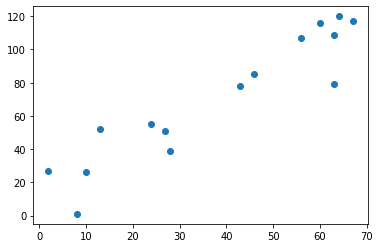

In [42]:
plt.scatter(vision["Photoreceptor activity"],vision["Number of stem cells"]);

In [33]:
r,p = pearsonr(vision["Photoreceptor activity"],vision["Number of stem cells"])
print(r)
print(p)

0.934465030624902
3.4014452255524923e-07


Proportion of variation

In [34]:
r ** 2

0.8732248934607991

Slope

In [36]:
slope = r * ( np.std(vision["Photoreceptor activity"],ddof=1) / np.std(vision["Number of stem cells"],ddof=1) )
slope

0.5722511760457536

Intercept

In [37]:
intercept = np.mean(vision["Photoreceptor activity"]) - slope * np.mean(vision["Number of stem cells"])
intercept

-2.2487165973726846

In [40]:
(0 - intercept) / slope

3.9295971620561447

In [32]:
mod = smf.ols('Q("Photoreceptor activity") ~ Q("Number of stem cells")', data=vision) #Q('') is used for columns with spaces
res = mod.fit()

res.summary()

/home/natasha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Q("Photoreceptor activity")   R-squared:                       0.873
Model:                                     OLS   Adj. R-squared:                  0.863
Method:                          Least Squares   F-statistic:                     89.54
Date:                         Sat, 26 Mar 2022   Prob (F-statistic):           3.40e-07
Time:                                 13:13:10   Log-Likelihood:                -52.586
No. Observations:                           15   AIC:                             109.2
Df Residuals:                               13   BIC:                             110.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.2487      4.830     -0.466      0.649     -12.683       8.186
Q("Number of stem cells")     0.5723      0.060      9.463      0.000       0.442       0.703
==============================================================================
Omnibus:                        3.329   Durbin-Watson:                   2.946
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.242
Skew:                           0.606   Prob(JB):                        0.537
Kurtosis:                       3.720   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


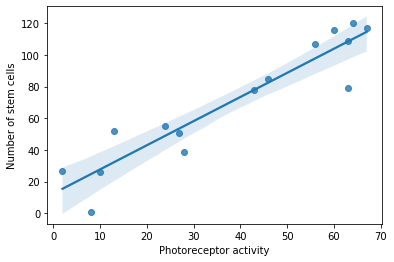

In [43]:
sns.regplot(vision["Photoreceptor activity"],vision["Number of stem cells"]);